In [9]:
from qiskit import *
from qiskit.circuit.library.standard_gates import XGate
from qiskit.tools.visualization import plot_distribution
from qiskit_aer import AerSimulator
import matplotlib.pyplot as plt

plt.style.use(['science', 'notebook', 'grid', 'dark_background'])

The two mot common interpretations of Quantum Mechanics are the *Copenhagen Interpretation* and the *Many Worlds Interpretation,* which often contest with each other. In the context of Schrödinger's Cat, the Copenhagen Interpretation states that the cat is both dead and alive until the box is opened, at which point the cat is either dead or alive. The Many Worlds Interpretation states that the cat is both dead and alive, but in different universes.

David Deutsch proposed a thought experiment to test the Many Worlds Interpretation and concluded that this **No-Collapse Theory** against the Copenhagen Interpretation, a Collapse Theory, which contains irreversible measurements and subsequent collapse.

We'll use a simple example in the form of a quantum coin flip to illustrate this expreiment. We initialize 3 qubits, as
1. A *Coin Qubit* in state $\ket{+}$,
2. A *Decision/Memory Qubit* in state $\ket{0}$, and
3. A *Result Qubit* in state $\ket{0}$.

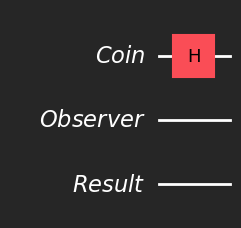

In [3]:
qr_coin = QuantumRegister(1, 'Coin')
qr_obs = QuantumRegister(1, 'Observer')
qr_res = QuantumRegister(1, 'Result')

qc = QuantumCircuit(qr_coin, qr_obs, qr_res)
qc.h(0)

qc.draw('mpl', style = 'iqx-dark')

# The No-Collapse Case:

The Coin Qubit is now in a heads-tails superposition $$H\ket{0}=\frac{1}{\sqrt{2}}(\ket{0}+\ket{1})$$ Now we consider the No-Collapse case, where the observer's quantum measurement is reversible:

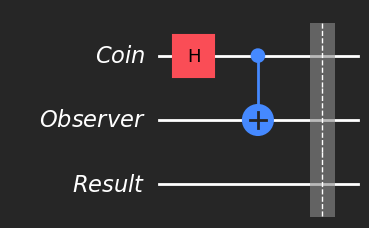

In [4]:
qc.cx(0, 1)
qc.barrier()

qc.draw('mpl', style = 'iqx-dark')

If the outcome is heads, the Observer Qubit is flipped to $\ket{1}$, and the Result Qubit is flipped to $\ket{1}$, and if the outcome is tails, the Observer Qubit is flipped to $\ket{0}$, and the Result Qubit is flipped to $\ket{0}$: $$\frac{1}{\sqrt{2}}(\ket{0}+\ket{1})\otimes\ket{0}\equiv\ket{\Phi^+}=\frac 1{\sqrt 2}(\ket{00}+\ket{11})$$ By performing a **parity check** on the Observer Qubit and the Result Qubit, we can determine the outcome of the coin flip:

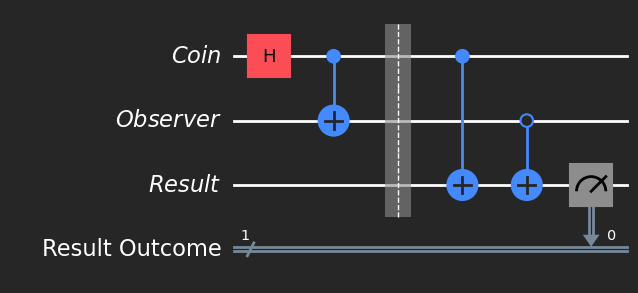

In [5]:
qc.cx(0, 2)

acx = XGate().control(1, ctrl_state = '0') # Pauli-X gate controlled by 1 qubit
qc.append(acx, [1, 2])

cr_res = ClassicalRegister(1, 'Result Outcome')
qc.add_register(cr_res)
qc.measure(2, 0)

qc.draw('mpl', style = 'iqx-dark')

This checks whether the Observer Qubit and the Result Qubit are in the same state, and if they are, the coin flip is heads, and if they are not, the coin flip is tails. This is a reversible measurement, and the quantum state of the Coin Qubit is preserved.

We now apply a CNOT Gate to the Coin Qubit and the Observer Qubit to unentangle the observer from its qubit, returning the coin to its **original** Plus State $\ket{+}$. To find out if this has worked, we need to do an *X-Basis Measurement* on the Coin Qubit, done by applying a Hadamard Gate to the Coin Qubit and then measuring it. If the outcome is $\ket{0}$, the coin flip was heads, and if the outcome is $\ket{1}$, the coin flip was tails.

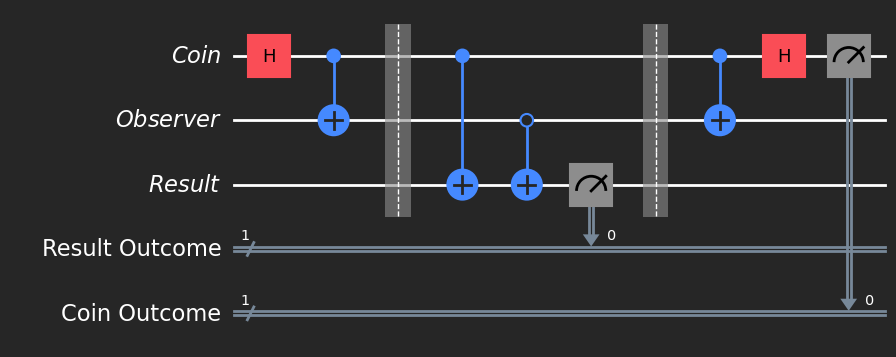

In [6]:
qc.barrier()
qc.cx(0, 1)

cr_qubit = ClassicalRegister(1, 'Coin Outcome')
qc.add_register(cr_qubit)

qc.h(0)
qc.measure(0, 1)

qc.draw('mpl', style = 'iqx-dark')

The observed outcome after simulation dictates that a measuement was made, and yet the measurement was reversed.

{'0 1': 1024}


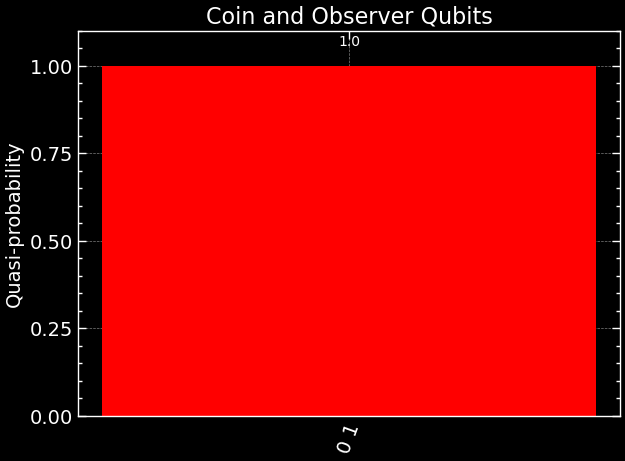

In [11]:
backend = AerSimulator()    
qc_transpiled = transpile(qc, backend)

result = backend.run(qc_transpiled).result()
counts = result.get_counts()

print(counts)
plot_distribution(counts, title = 'Coin and Observer Qubits', color = 'red')

# The Collapse Case:

To model the Collapse Case, we need to introduce an irreversible measurement. We'll use the same initial state, but this time, we'll measure the Coin Qubit directly, and then apply a CNOT Gate to the Observer Qubit and the Result Qubit to record the outcome of the coin flip:

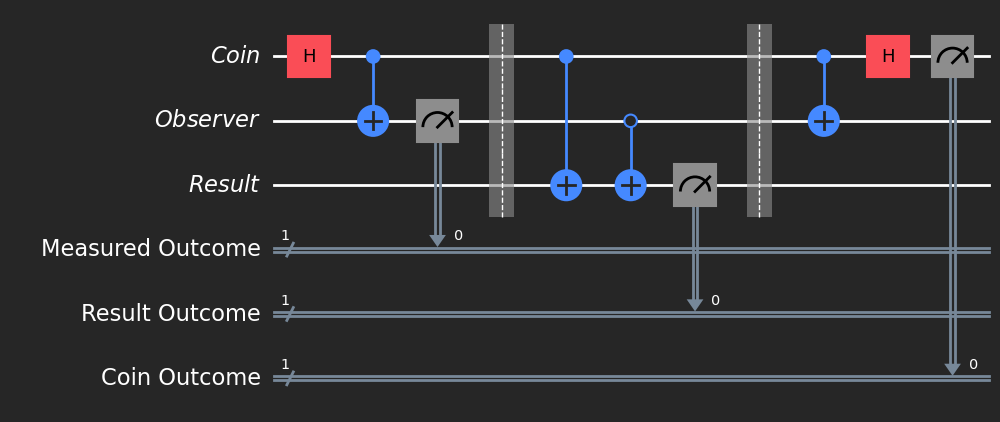

In [12]:
cr_measured = ClassicalRegister(1, 'Measured Outcome')
qc = QuantumCircuit(qr_coin, qr_obs, qr_res, cr_measured, cr_res, cr_qubit)

qc.h(0)
qc.cx(0, 1)
qc.measure(1, 0)

qc.barrier()
qc.cx(0, 2)

acx = XGate().control(1, ctrl_state = '0')
qc.append(acx, [1, 2])
qc.measure(2, 1)

qc.barrier()
qc.cx(0, 1)
qc.h(0)
qc.measure(0, 2)

qc.draw('mpl', style = 'iqx-dark')

This destroys the coherence of the Coin and Observer Qubits, collapsing the superposition of the Coin Qubit to a definite state, and the quantum state of the Coin Qubit is not preserved. The joint Coin-Observer qubits' state is now the Density Matrix $$\frac 12(\ket{00}\bra{00}+\ket{11}\bra{11})$$

{'0 1 1': 286, '1 1 1': 251, '1 1 0': 251, '0 1 0': 236}


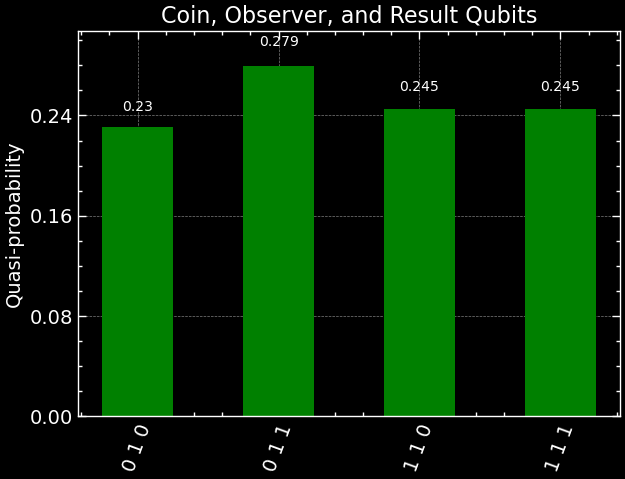

In [13]:
qc_transpiled = transpile(qc, backend)

result = backend.run(qc_transpiled).result()
counts = result.get_counts()

print(counts)
plot_distribution(counts, title = 'Coin, Observer, and Result Qubits', color = 'green')

This tells us that the midcircuit measurement is $\ket{0}$ half the time and $\ket{1}$ half the time, and the Observer's Qubit is in the same state as the Result Qubit half the time, and in the opposite state half the time. This is an irreversible measurement, and the quantum state of the Coin Qubit is not preserved. This is how we expreimentally distinguish between the No-Collapse and Collapse Cases, or the two interpretations of Quantum Mechanics concerned.